In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import pickle
import scipy.io as spio
import scipy.stats as sp
import mat73
import seaborn as sns
from scipy.special import factorial
from scipy.special import logsumexp
import matplotlib
import pandas as pd

from scipy import stats

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import replay_structure.structure_models as models
from replay_structure.run_snippet_preprocessing import Run_Snippet_Preprocessing
import replay_structure.metadata as meta
from replay_structure.utils import get_marginal_sum, get_p_models

from replay_structure.metadata import (
    Likelihood_Function,
    Model,
    Diffusion,
    Momentum,
    Stationary,
    Stationary_Gaussian,
    Random,
    Data_Type,
    string_to_data_type,
    string_to_model,
    Session_Indicator,
    string_to_session_indicator,
    string_to_likelihood_function,
)

## load gridsearch results and model comparison

In [4]:
bin_size_cm=5
time_window_ms=15

In [5]:
DATA_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = DATA_PATH+'/structure_analysis_input/Data4Pset_ripples_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'


In [6]:
with open(filename, "rb") as file_object:
    raw_data = file_object.read()
    structure_data = pickle.loads(raw_data)

## grid search parameters

In [60]:
sg_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'stationary_gaussian'].tolist()
sg_sd = sg_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][sg_index]

sd_array_meters_sg = np.logspace(-2, 0.3, 30).round(2)

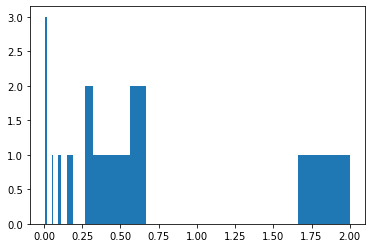

In [62]:
plt.figure()
plt.hist(sg_sd, bins=sd_array_meters_sg)
plt.show()

In [222]:
diff_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'diffusion'].tolist()
diff_sd = dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][diff_index]

array_meters_diff = np.logspace(-1, 0.8, 30).round(2)

In [226]:
dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'].shape

(294,)

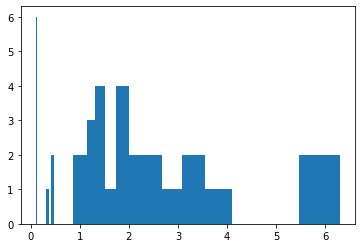

In [63]:
plt.figure()
plt.hist(diff_sd, bins=array_meters_diff)
plt.show()

In [54]:
mom_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'momentum'].tolist()

mom_decay = mom_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['decay'][mom_index]
decay_array=np.array([1, 25, 50, 75, 100, 200, 300, 400, 500, 800])

mom_sd = mom_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][mom_index]
sd_array_meters=np.logspace(1.6, 2.6, 30).round(2)

In [47]:
mom_decay

array([ 25,  25,  50,  75,  25,  75,   1,   1,   1,   1,  25,  50,  50,
        50,  75,  25, 300,   1, 100,   1,   1,  25,  25,  50,  50,   1,
         1,  50,   1,   1,  25, 200,  75, 800,   1,  50,  50, 800,  50,
         1,   1,   1,   1, 800,  75,  50, 200,  50,   1, 400,   1,   1,
         1,   1,  25,  75,  75,   1, 800,   1,   1, 800,   1,   1,   1,
         1, 500,   1,   1,  25,   1, 800,   1, 800, 800,   1, 200, 800,
       200,   1,   1,   1, 500, 800,  75, 800,  25,  50,   1,  25,   1,
       400,  50,   1,   1, 300,   1,   1, 500,  50, 800,  25,   1, 800,
       800, 800, 800, 800, 300, 800, 500])

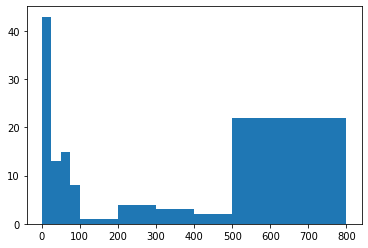

In [57]:
plt.figure()
plt.hist(mom_decay, bins=decay_array)
plt.show()

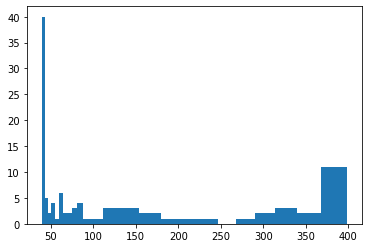

In [58]:
plt.figure()
plt.hist(mom_sd, bins=sd_array_meters)
plt.show()